# How to be Choosy: Toxic Release Inventory 2023 - CA
_by Michelle Hoda Wilkerson_

<div class="alert alert-block alert-info"> <b>NOTE:</b> This notebook is written to illustrate the data wrangling moves described in [anonymized manuscript], using a dataset about toxic release events in California as reported by the U. S. Environmental Protection Agency in the 2023 (see <a href="#about">here</a> for more information). Some of the text below is excerpted from the manuscript. Each section below corresponds to a subheading in the manuscript. See also How to be Choosy: Billboard Hot 100. </div>

With any Jupyter notebook, we begin by importing the necessary libraries. You should run the cell below before running any other code. Here, we are using the `pandas` library, an industry standard that provides us with special methods for reading in and working with data in Python. We also import `folium`, which allows us to create maps using latitude and longitude data.

In [1]:
import pandas # for data wrangling
import folium # for the map
import numpy as np # for calculations
import warnings # to silence warnings

# if there are more than 10 records to show in a table, only show the first and last 5
pandas.set_option('display.max_rows', 10) 
#suppress warnings
warnings.filterwarnings('ignore')

# read the contents of tri23ca.csv into a dataframe
tri23ca = pandas.read_csv("tri23ca.csv")

# Table of Contents
* [Introduction to the TRI23CA Dataset](#Introduction-to-TRI23CA)
* [Wrangling Too Many Cases](#Wrangling-Too-Many-Cases-)
    * [Random Selection](#Random-Selection-)
    * [Purposeful Selection by Attribute(s)](#Purposeful-Selection-by-Attribute(s)-)
    * [Building Your Own Selection Attribute](#Building-Your-Own-Selection-Attribute-)
* [Wrangling Too Many Attributes](#Wrangling-Too-Many-Attributes-)
    * [Thematic Selection](#Thematic-Selection-)
    * [Pattern-Driven Selection](#Pattern-Driven-Selection-)
    * [Question-Driven Selection](#Question-Driven-Selection-)
* [More About This Dataset](#About-the-Toxic-Release-Inventory-2023---CA-Dataset)

# Introduction to TRI23CA

Let's check out the dataset. In the setup code above, we read the csv file and used the `pandas` library to process this information and turn it into a data frame called `tri23ca`. The line below, which just says `tri23ca`, will give a brief summary of the contents of the dataframe so you can check and make sure it has been read and processed correctly. Since there are too many cases to list, you will see the first five rows and the last five rows of the dataset, with "..." in the middle to indicate there are more cases that are not shown.

In [2]:
tri23ca # show us the contents of the new data frame

,Year,Trifd,Frs id,Facility name,Street address,City,County,St,Zip,Bia,...,Energy recover on,Energy recover of,Recycling on site,Recycling off sit,Treatment on site,Treatment off site,Production waste,One-time release,Prod_ratio_or_ activity,Production ratio
0,2023,93307KRNLRRR677,110000481611,KERN ENERGY,7724 EAST PANAMA LANE,BAKERSFIELD,KERN,CA,93307,NaN,...,0.0,0.0,0.0,0.0,4.6,0.0,12.600,NaN,PRODUCTION,1.02
1,2023,93033KSRLM1001M,110000481318,ALUMINUM PRECISION PRODUCTS INC.,1001 MC WANE BLVD,OXNARD,VENTURA,CA,93033,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,52.970,NaN,PRODUCTION,1.00
2,2023,9000WLDCNT5855H,110043694856,OLD COUNTRY MILLWORK INC.,5855 HOOPER AVE,LOS ANGELES,LOS ANGELES,CA,90001,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,754.880,NaN,PRODUCTION,1.00
3,2023,95482LSNPC850HO,110064125682,MENDOCINO FOREST PRODUCTS CO. LLC,880 KUNZLER RANCH RD,UKIAH,MENDOCINO,CA,95482,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,18.390,NaN,PRODUCTION,1.10
4,2023,9567WWLBRL841WE,110070203035,WILBUR ELLIS CO LLC RIO LINDA HUB,841 W ELKHORN BLVD,RIO LINDA,SACRAMENTO,CA,95673,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000,NaN,ACTIVITY,1.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3477,2023,90241KFFBR8247P,110000474424,K F FIBERGLASS INC,8247 PHLOX ST,DOWNEY,LOS ANGELES,CA,90241,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,6850.000,NaN,PRODUCTION,0.57
3478,2023,92121FRZPN6625M,110000478885,SHERWIN-WILLIAMS CO,6625 MIRAMAR RD,SAN DIEGO,SAN DIEGO,CA,92121,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1104.000,NaN,PRODUCTION,0.99
3479,2023,94553SHLLL3485P,110000483245,MARTINEZ REFINING CO LLC,3485 PACHECO BLVD,MARTINEZ,CONTRA COSTA,CA,94553,NaN,...,0.0,0.0,0.0,0.0,39000.0,0.0,39004.002,NaN,PRODUCTION,0.82
3480,2023,90723PRMNT14700,110000475940,AIR PRODUCTS MANUFACTURING LLC,14700 DOWNEY AVE,PARAMOUNT,LOS ANGELES,CA,90723,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,56.540,NaN,PRODUCTION,0.35


At the bottom of the output from our code above, we can see the specific dimensions of this dataset. It has 3482 cases (rows), and 122 attributes (columns). Below, we model the different wrangling strategies described in _How to be Choosy_ to reduce the size and/or complexity of the `tri23ca` dataset so that it is more appropriate for different educational applications.

Let's create a map of all the toxic release events recorded in the tri23ca dataset, using the listed latitude and longitude of each site.

In [3]:
# Calculate the center of the map
center_lat = tri23ca['Latitude'].mean()
center_lon = tri23ca['Longitude'].mean()

# Create the Folium map
map = folium.Map(location=[center_lat, center_lon], zoom_start=5)

# Add markers for each row in the DataFrame
for index, row in tri23ca.iterrows():
    lat = row['Latitude']
    lon = row['Longitude']

    # Add the marker
    folium.Marker([lat, lon]).add_to(map)

map

# Wrangling Too Many Cases <a class="anchor" id="cases"></a>

## Random Selection <a class="anchor" id="random"></a>

Random selection extracts random rows from a large dataset to create one of a more manageable size. This is the most appropriate strategy for downsizing a dataset while preserving a representative snapshot of the full phenomenon to be studied. Starting with your dataframe, you can create a random selection from that dataframe using the sample() method. Below, we select exactly 100 random cases from the `tri23ca` dataset and save them as a new reduced dataset called minitri23ca. If you run the code more than once, you will see that different cases are included in the dataset output each time.

In [4]:
minitri23ca = tri23ca.sample(100) # put a randomly selected 5000 rows in bh100reduced
minitri23ca

,Year,Trifd,Frs id,Facility name,Street address,City,County,St,Zip,Bia,...,Energy recover on,Energy recover of,Recycling on site,Recycling off sit,Treatment on site,Treatment off site,Production waste,One-time release,Prod_ratio_or_ activity,Production ratio
2258,2023,94545RHMND25500,110000483138,ROHM & HAAS CHEMICALS LLC,25500 WHITESELL ST,HAYWARD,ALAMEDA,CA,94545,NaN,...,0.0,0.0,0.0,0.00,2613.000,35.0,3140.000,NaN,PRODUCTION,0.92
2078,2023,90040VPKSN2600S,110012702156,UNIVAR SOLUTIONS USA INC.,2600 S GARFIELD AVE,COMMERCE,LOS ANGELES,CA,90040,NaN,...,0.0,0.0,0.0,0.00,526.244,0.0,790.986,NaN,PRODUCTION,1.35
2916,2023,90745HCKMN900WA,110000499103,HUCK INTERNATIONAL INC,900 E WATSON CENTER RD,CARSON,LOS ANGELES,CA,90745,NaN,...,0.0,0.0,0.0,0.00,0.000,0.0,36049.800,NaN,PRODUCTION,1.04
3257,2023,92121PRGRM925BR,110039018817,AMETEK PROGRAMMABLE POWER,9250 BROWN DEER RD,SAN DIEGO,SAN DIEGO,CA,92121,NaN,...,0.0,0.0,0.0,706.49,0.000,0.0,706.629,NaN,PRODUCTION,1.00
2148,2023,93274KRFTG800EP,110038364427,SAPUTO CHEESE USA INC.,800 E PAIGE AVE,TULARE,TULARE,CA,93274,NaN,...,0.0,0.0,0.0,0.00,0.000,1470133.8,1633482.000,NaN,PRODUCTION,1.29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
508,2023,90039CBGGY5121S,110000473648,HUNTSMAN ADVANCED MATERIALS AMERICAS LLC-LA SITE,5121 SAN FERNANDO RD W,LOS ANGELES,LOS ANGELES,CA,90039,NaN,...,0.0,0.0,0.0,1.99,0.000,0.0,374.209,NaN,PRODUCTION,0.75
44,2023,92355BNNZL11711,110023012942,SIERRA ALUMINUM CO PLANT II,11806-11880 PACIFIC AVE,FONTANA,SAN BERNARDINO,CA,92337,NaN,...,0.0,0.0,0.0,0.00,0.000,0.0,8.009,NaN,PRODUCTION,0.74
1000,2023,90039GLYNN4578B,110000473657,A.G. LAYNE INC.,4578 BRAZIL ST,LOS ANGELES,LOS ANGELES,CA,90039,NaN,...,0.0,0.0,0.0,0.00,0.000,0.0,258.000,NaN,ACTIVITY,0.28
3422,2023,91746LGHTM13329,110000477939,CUSTOM ALLOY SALES INC.,13329 ECTOR ST,CITY OF INDUSTRY,LOS ANGELES,CA,91746,NaN,...,0.0,0.0,0.0,0.00,0.000,0.0,0.000,0.0,NaN,0.00


A related technique is interpolated selection, or selecting every <i>n</i>th row of a data table. This might be useful when the order of the data matters (for example, if records are organized by date and you are interested in modeling patterns over time). However, we do not recommend interpolated selection unless you have a specific reason for using this method, because it can also lead to unintentionally non-random sampling.

In [5]:
minitri23ca = tri23ca.iloc[::30, :] # put every 30th row of tri23ca in minitri23ca
minitri23ca

,Year,Trifd,Frs id,Facility name,Street address,City,County,St,Zip,Bia,...,Energy recover on,Energy recover of,Recycling on site,Recycling off sit,Treatment on site,Treatment off site,Production waste,One-time release,Prod_ratio_or_ activity,Production ratio
0,2023,93307KRNLRRR677,110000481611,KERN ENERGY,7724 EAST PANAMA LANE,BAKERSFIELD,KERN,CA,93307,NaN,...,0.0,0.0,0.0,0.0,4.6,0.00,12.600,NaN,PRODUCTION,1.02
30,2023,90224WNSCR1501N,110009536421,OWENS CORNING ROOFING & ASPHALT LLC,1501 N TAMARIND AVE,COMPTON,LOS ANGELES,CA,90222,NaN,...,0.0,0.0,0.0,0.0,0.0,0.00,0.000,0.0,NaN,0.00
60,2023,95012LTRPR11225,110025317707,FUJIFILM ULTRA PURE SOLUTIONS INC.,11225 COMMERCIAL PKWY,CASTROVILLE,MONTEREY,CA,95012,NaN,...,0.0,0.0,0.0,8503.0,0.0,0.00,8562.000,NaN,PRODUCTION,1.10
90,2023,90245CHVRN324WE,110002899908,CHEVRON PRODUCTS CO. DIV OF CHEVRON USA INC.,324 W EL SEGUNDO BLVD,EL SEGUNDO,LOS ANGELES,CA,90245,NaN,...,0.0,0.0,0.0,0.0,0.0,0.00,3769.000,NaN,PRODUCTION,0.91
120,2023,92113RCSND2295E,110000478830,TESORO - SAN DIEGO TERMINAL,2295 HARBOR DR,SAN DIEGO,SAN DIEGO,CA,92113,NaN,...,0.0,0.0,15000.0,0.0,0.0,0.00,15250.000,NaN,ACTIVITY,0.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3360,2023,9264WCMBRM581SK,110033625977,CAMBRO MANUFACTURING CO SKYLAB RD. FACILITY,5801 SKYLAB RD.,HUNTINGTON BEACH,ORANGE,CA,92647,NaN,...,0.0,0.0,0.0,0.0,0.0,0.00,0.002,NaN,PRODUCTION,0.99
3390,2023,92054HYDRN401JO,110000478634,HYDRANAUTICS,401 JONES RD,OCEANSIDE,SAN DIEGO,CA,92058,NaN,...,0.0,0.0,0.0,28211.0,0.0,1625287.48,1654790.000,NaN,PRODUCTION,0.90
3420,2023,90502RDMNQ198NR,110000902630,REDMAN EQUIPMENT & MANUFACTURING CO,19800 NORMANDIE AVE,TORRANCE,LOS ANGELES,CA,90502,NaN,...,0.0,0.0,0.0,2398.0,0.0,0.00,2491.000,NaN,PRODUCTION,0.22
3450,2023,94572NCLSNOLDHI,110000483487,PHILLIPS 66 RODEO RENEWABLE ENERGY COMPLEX,1380 SAN PABLO AVE,RODEO,CONTRA COSTA,CA,94572,NaN,...,0.0,0.0,0.0,0.0,1832.0,0.00,1881.000,NaN,PRODUCTION,0.90


## Purposeful Selection by Attribute(s) <a class="anchor" id="purposeful"></a>

Purposeful selection involves reducing a dataset so that it only includes records with certain characteristics related to one or more attributes. This method is appropriate if you suspect that the majority of records in your too-large dataset are not useful or usable for your intended activity. To get all the cases in a dataframe that meet certain conditions, use the expression dataframe[condition]. Below, we want only the toxic releases that involved known carcinogens, represented in tri23ca by records where the ‘Carcinogen’ value is set to YES.

In [6]:
carcinogens = tri23ca['Carcinogen']=="YES"  # for each song, see if the highest position was 1
minitri23ca = tri23ca[carcinogens]              # put only top song records in the reduced dataset
minitri23ca

,Year,Trifd,Frs id,Facility name,Street address,City,County,St,Zip,Bia,...,Energy recover on,Energy recover of,Recycling on site,Recycling off sit,Treatment on site,Treatment off site,Production waste,One-time release,Prod_ratio_or_ activity,Production ratio
0,2023,93307KRNLRRR677,110000481611,KERN ENERGY,7724 EAST PANAMA LANE,BAKERSFIELD,KERN,CA,93307,NaN,...,0.0,0.0,0.00,0.0,4.60,0.0,12.600,NaN,PRODUCTION,1.02
7,2023,9190WBLVRD2463R,110060258590,US CBP BOULEVARD BORDER PATROL STATION #CA11560,2463 RIBBONWOOD ROAD,BOULEVARD,SAN DIEGO,CA,91905,NaN,...,0.0,0.0,0.00,0.0,0.00,0.0,2101.000,NaN,ACTIVITY,1.01
8,2023,90222DMNNK2000N,110000474353,DEMENNOKERDOON DBA WORLD OIL RECYCLING,2000 NORTH ALAMEDA STREET,COMPTON,LOS ANGELES,CA,90222,NaN,...,0.0,426.3,41123.43,0.0,13.84,0.0,41563.653,NaN,PRODUCTION,1.05
10,2023,9325WGFPTH1174R,110064544907,GFP ETHANOL LLC DBA CALGREN RENEWABLE FUELS,11704 ROAD 120,PIXLEY,TULARE,CA,93256,NaN,...,0.0,0.0,0.00,0.0,25588.61,0.0,30254.570,NaN,PRODUCTION,0.63
11,2023,9453WSLYND477KA,110035441108,TESLA INC.,47700 KATO ROAD,FREMONT,ALAMEDA,CA,94538,NaN,...,0.0,0.0,0.00,54653.0,0.00,0.0,58115.000,NaN,PRODUCTION,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3470,2023,90801LNZNC20851,110000476280,SOLVAY USA INC,20851 S SANTA FE AVE,LONG BEACH,LOS ANGELES,CA,90810,NaN,...,0.0,0.0,0.00,0.0,0.00,0.0,0.000,0.0,NaN,0.00
3473,2023,90040FDRLP6001S,110009527805,THE NEWARK GROUP INC. DBA GREIF INC.,6001 S EASTERN AVE,LOS ANGELES,LOS ANGELES,CA,90040,NaN,...,0.0,0.0,0.00,0.0,0.00,0.0,5.427,NaN,PRODUCTION,0.61
3475,2023,93420NCLSN2555W,110000481755,PHILLIPS 66 CO-SANTA MARIA REFINERY,2555 WILLOW RD,ARROYO GRANDE,SAN LUIS OBISPO,CA,93420,NaN,...,0.0,0.0,0.00,0.0,0.00,0.0,0.053,NaN,ACTIVITY,0.46
3477,2023,90241KFFBR8247P,110000474424,K F FIBERGLASS INC,8247 PHLOX ST,DOWNEY,LOS ANGELES,CA,90241,NaN,...,0.0,0.0,0.00,0.0,0.00,0.0,6850.000,NaN,PRODUCTION,0.57


## Building Your Own Selection Attribute <a class="anchor" id="byo"></a>

There are other ways of creating a smaller dataset based on information that is not already available in the dataset itself. These could be specific cases that you identify manually, or cases you might identify using computer code to extract some new, meaningful information from the attributes you already have. These techniques allow teachers and students the most customization, but they require careful planning to select and identify which cases should be included and to consider how those decisions will shape what analyses and claims are appropriate. 

### By Identifying Specific Indices

Sometimes, you may want to create a small dataset through manually selecting a small number of cases from a larger data corpus. This can be helpful, for example, if you would like students to work with a small set of familiar cases before diving into larger-scale analyses. The Billboard Hot 100 notebook shows an example of how you might build a list of the ID numbers or _indices_ of the cases you want to include. Below, we create a dataset by directly searching for certain words, in order to create a dataset that includes records from facilities that are directly mentioned in the fifth paragraph of [this 2023 CalMatters article](https://calmatters.org/environment/2023/12/california-hazardous-toxic-waste-mexico/). These facilities are presented as examples of some of the many California-based facilities that export their waste to recycling facilities in Mexico.

In [7]:
# use the lines below to create a list of all the records with Facility names
# the plus sign attaches lists of records for each keyword together into one list

mentionedFacilities =  tri23ca['Facility name'].str.contains("SHERWIN") + tri23ca['Facility name'].str.contains("NAVY") + tri23ca['Facility name'].str.contains("TESLA")
minitri23ca = tri23ca[mentionedFacilities]
minitri23ca # show the full records

,Year,Trifd,Frs id,Facility name,Street address,City,County,St,Zip,Bia,...,Energy recover on,Energy recover of,Recycling on site,Recycling off sit,Treatment on site,Treatment off site,Production waste,One-time release,Prod_ratio_or_ activity,Production ratio
11,2023,9453WSLYND477KA,110035441108,TESLA INC.,47700 KATO ROAD,FREMONT,ALAMEDA,CA,94538,NaN,...,0.0,0.0,0.0,54653.0,0.0,0.0,58115.00,NaN,PRODUCTION,1.25
155,2023,9453WSLYND477KA,110035441108,TESLA INC.,47700 KATO ROAD,FREMONT,ALAMEDA,CA,94538,NaN,...,0.0,0.0,0.0,102525.0,0.0,0.0,115524.81,NaN,PRODUCTION,1.25
187,2023,90745LDQKR21243,110000476119,SHERWIN-WILLIAMS CO,12401 INDUSTRIAL BLVD,VICTORVILLE,SAN BERNARDINO,CA,92395,NaN,...,0.0,1962.0,0.0,0.0,0.0,159.0,2329.00,NaN,PRODUCTION,0.81
299,2023,93042SNVYN311MA,110022811554,U.S. NAVY NBVC NAVAL AIR STATION POINT MUGU,311 MAIN RD SUITE #1,POINT MUGU,VENTURA,CA,93042,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,2.50,NaN,PRODUCTION,1.00
340,2023,94538NWNTD45500,110000482898,TESLA INC,45500 FREMONT BLVD,FREMONT,ALAMEDA,CA,94538,NaN,...,0.0,75454.0,0.0,37723.0,0.0,0.0,187368.20,NaN,PRODUCTION,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3272,2023,94538NWNTD45500,110000482898,TESLA INC,45500 FREMONT BLVD,FREMONT,ALAMEDA,CA,94538,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,56382.20,NaN,PRODUCTION,1.25
3343,2023,9533WTSLNC1826H,110038078237,TESLA INC,18260 HARLAN RD,LATHROP,SAN JOAQUIN,CA,95330,NaN,...,0.0,0.0,0.0,1884.5,0.0,0.0,1888.32,NaN,PRODUCTION,1.68
3416,2023,94538NWNTD45500,110000482898,TESLA INC,45500 FREMONT BLVD,FREMONT,ALAMEDA,CA,94538,NaN,...,0.0,0.0,0.0,124864.5,0.0,0.0,124874.50,NaN,PRODUCTION,1.25
3447,2023,94538NWNTD45500,110000482898,TESLA INC,45500 FREMONT BLVD,FREMONT,ALAMEDA,CA,94538,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,103600.00,NaN,PRODUCTION,1.25


### Using Code to Construct a New Attribute

In other cases, you may want to use code to systematically filter certain records for deeper analysis. Let's imagine we want to explore records where carcinogenic chemicals that are listed as hazardous under the Clean Air Act were released on-site at facilities, either as "Fugitive air" or "Stack air" releases. This requires a complex combination of conditions, which we step through one by one below.

In [8]:
# first, we can get all the records that released a Clean Air Act hazardous chemical.
searchFor = tri23ca['Clean air act chemical']=="YES" 
minitri23ca = tri23ca[searchFor]
# this yields 2123 records

# from those records that we know involve Clean Air Act chemicals, find the carcinogens.
searchFor = minitri23ca['Carcinogen']=="YES"
minitri23ca = minitri23ca[searchFor]
# this yields 729 records

# finally, let's select records where there was an air release. We'll keep the record in 
# the dataset if the amount of chemicals released as 'Fugitive air' or as 'Stack air'
# are larger than 0.
minitri23ca = minitri23ca[(minitri23ca['Fugitive air']>0) | (minitri23ca['Stack air']>0)]
minitri23ca # finally, there are a total of 554 records

,Year,Trifd,Frs id,Facility name,Street address,City,County,St,Zip,Bia,...,Energy recover on,Energy recover of,Recycling on site,Recycling off sit,Treatment on site,Treatment off site,Production waste,One-time release,Prod_ratio_or_ activity,Production ratio
0,2023,93307KRNLRRR677,110000481611,KERN ENERGY,7724 EAST PANAMA LANE,BAKERSFIELD,KERN,CA,93307,NaN,...,0.0,0.0,0.00,0.0,4.60,0.00,12.600,NaN,PRODUCTION,1.02
8,2023,90222DMNNK2000N,110000474353,DEMENNOKERDOON DBA WORLD OIL RECYCLING,2000 NORTH ALAMEDA STREET,COMPTON,LOS ANGELES,CA,90222,NaN,...,0.0,426.3,41123.43,0.0,13.84,0.00,41563.653,NaN,PRODUCTION,1.05
10,2023,9325WGFPTH1174R,110064544907,GFP ETHANOL LLC DBA CALGREN RENEWABLE FUELS,11704 ROAD 120,PIXLEY,TULARE,CA,93256,NaN,...,0.0,0.0,0.00,0.0,25588.61,0.00,30254.570,NaN,PRODUCTION,0.63
11,2023,9453WSLYND477KA,110035441108,TESLA INC.,47700 KATO ROAD,FREMONT,ALAMEDA,CA,94538,NaN,...,0.0,0.0,0.00,54653.0,0.00,0.00,58115.000,NaN,PRODUCTION,1.25
14,2023,94572NCLSNOLDHI,110000483487,PHILLIPS 66 RODEO RENEWABLE ENERGY COMPLEX,1380 SAN PABLO AVE,RODEO,CONTRA COSTA,CA,94572,NaN,...,0.0,0.0,0.00,0.0,0.00,0.00,27.000,NaN,PRODUCTION,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3456,2023,9135WRSPCD2554R,110066559067,AEROSPACE DYNAMICS INTERNATIONAL INC.,25540 RYE CANYON RD,VALENCIA,LOS ANGELES,CA,91355,NaN,...,0.0,0.0,0.00,5847.0,0.00,0.00,5856.000,NaN,PRODUCTION,0.51
3468,2023,93420NCLSN2555W,110000481755,PHILLIPS 66 CO-SANTA MARIA REFINERY,2555 WILLOW RD,ARROYO GRANDE,SAN LUIS OBISPO,CA,93420,NaN,...,0.0,0.0,0.00,0.0,0.00,55.58,59.460,NaN,ACTIVITY,0.01
3475,2023,93420NCLSN2555W,110000481755,PHILLIPS 66 CO-SANTA MARIA REFINERY,2555 WILLOW RD,ARROYO GRANDE,SAN LUIS OBISPO,CA,93420,NaN,...,0.0,0.0,0.00,0.0,0.00,0.00,0.053,NaN,ACTIVITY,0.46
3477,2023,90241KFFBR8247P,110000474424,K F FIBERGLASS INC,8247 PHLOX ST,DOWNEY,LOS ANGELES,CA,90241,NaN,...,0.0,0.0,0.00,0.0,0.00,0.00,6850.000,NaN,PRODUCTION,0.57


# Wrangling Too Many Attributes <a class="anchor" id="attributes"></a>

Another common issue when using large public datasets for educational purposes is the problem of too many attributes. Environmental datasets such as the TRI22CA dataset we use here can include hundreds of specific indicators; survey datasets from organizations such as the Pew Research Center similarly report scores of questions per participant. While having access to so many attributes can enable the pursuit of a variety of investigative questions, it can easily become overwhelming. Working with these datasets requires planning and thoughtfulness to consider which attributes are actually connected to one's research question.

## Thematic Selection <a class="anchor" id="thematic"></a>

Thematic selection involves splitting a dataset up into related, but distinct, groups of attributes that are more likely to be conceptually or statistically related to one another. Thematic attribute selection can be especially useful for jigsaw-like activities, in which different groups explore different aspects of an interconnected system. Below, we create thematic groups by information type in each toxic release report. You can then access a dataset with a reduced number of selected attributes by calling the dataframe with the attribute group name in brackets. You can include attributes from multiple groups using the plus sign: `dataframe[selection1+selection2]`. Below, we create a dataset with only the facility information and basic release information.

In [9]:
# Build our thematic categories using lists of column names
facility = ['Facility name','Federal facility']
location = ['Street address','City','County','St','Zip','Bia','Tribe','Latitude','Longitude','Horizontal datum']
company = ['Parent co name','Parent co db name','Standard parent co name','Foriegn parent co name','Foriegn parent co db num','Standard foriegn parent co name']
facilityType = ['Industry sector code','Industry sector','Primary sic','Sic 2','Sic 3','Sic 4','Sic 5','Sic 6','Primary naics','Naics 2','Naics 3','Naics 4','Naics 5','Naics 6']
filingInfo = ['Doc_ctrl_num','Form type']
basicInfo = ['Chemical','Elemental metal included','Clean air act chemical','Classification','Metal','Metal category','Carcinogen','PBT','PFAS','Unit of measure']
chemicalInfo = ['Tri chemical/compound id','Cas#','Srs id']
onSite = ['Fugitive air','Stack air','Water','Underground','Underground cl i','Underground cl ii-v','RCRA C landfill','Other landfills','Land treatment','RCRA Surface im','Other surface im','Other disposal','On-site total']
transfers = ['POTW Transfers for release','POTW Transfers for treatment','POTW Total transfers','Unclassified','Total transfer']
offSiteRelease = ['M10','M41','M62','M40 metal','M61 metal','M71','M81','M82','M72','M63','M66','M67','M64','M65','M73','M79','M90','M94','M99','Off-site release total']
offSiteRecycling = ['M20','M24','M26','M28','M93','Off-site recycled total']
offSiteRecovery = ['M56','M92','Off-site energy recovery t']
offSiteTreated = ['M40 non-metal','M50','M54','M61 non-metal','M69','M95','Off-site treated total']
toxicReleases = ['Total releases','Releases','On-site contained','Off-site other','Off-site contain','Off-site other r','Energy recover on','Energy recover of','Recycling on site','Recycling off sit','Treatment on site','Treatment off site','Production waste','One-time release','Prod_ratio_or_activity','Production ratio']

# use brackets to reference only the columns associated with one category.
minitri23ca = tri23ca[facility+basicInfo]
minitri23ca

,Facility name,Federal facility,Chemical,Elemental metal included,Clean air act chemical,Classification,Metal,Metal category,Carcinogen,PBT,PFAS,Unit of measure
0,KERN ENERGY,NO,Polycyclic aromatic compounds,NO,YES,PBT,NO,Non_Metal,YES,YES,NO,Pounds
1,ALUMINUM PRECISION PRODUCTS INC.,NO,Copper,NO,NO,TRI,YES,Elemental metals,NO,NO,NO,Pounds
2,OLD COUNTRY MILLWORK INC.,NO,Chromium and Chromium Compounds(except for ch...,YES,YES,TRI,YES,Metal complound categories,NO,NO,NO,Pounds
3,MENDOCINO FOREST PRODUCTS CO. LLC,NO,Copper And Copper Compounds,YES,NO,TRI,YES,Metal complound categories,NO,NO,NO,Pounds
4,WILBUR ELLIS CO LLC RIO LINDA HUB,NO,Chlorsulfuron,NO,NO,TRI,NO,Non_Metal,NO,NO,NO,Pounds
...,...,...,...,...,...,...,...,...,...,...,...,...
3477,K F FIBERGLASS INC,NO,Styrene,NO,YES,TRI,NO,Non_Metal,YES,NO,NO,Pounds
3478,SHERWIN-WILLIAMS CO,NO,Zinc compounds,NO,NO,TRI,YES,Metal complound categories,NO,NO,NO,Pounds
3479,MARTINEZ REFINING CO LLC,NO,Diethanolamine,NO,YES,TRI,NO,Non_Metal,NO,NO,NO,Pounds
3480,AIR PRODUCTS MANUFACTURING LLC,NO,Benzene,NO,YES,TRI,NO,Non_Metal,YES,NO,NO,Pounds


## Pattern-Driven Selection <a class="anchor" id="pattern"></a>

Similar to thematic selection, pattern-driven selection allows educators and students to focus only on the attributes that are known to align with investigative or pedagogical goals. Whereas thematic selection focuses on the real-world relationships and system components that a student may wish to explore, pattern selection focuses attention on particular mathematical relationships and analytic methods that the dataset makes available for investigation.

Below, we demonstrate one example of pattern-driven selection that focuses on attribute type. We create a group focused on boolean variables about each toxic release event. Using this form of pattern-driven selection, educators and designers can introduce students to the methods and strategies for exploring categorical relationships in a dataset, and to identify the ones that might be especially worth pursuing further. We use Python to create crosstabs for a set of relevant columns in the dataframe. In BH100, we demonstrate how to similarly generate a correlation matrix to examine the patterns among quantitative columns in a dataframe.

In [10]:
# Let's limit our dataset to some of the most relevant categorical attributes
toExplore = ['Federal facility',
             'Clean air act chemical',
             'Carcinogen',
             'PBT']
minitri23ca = tri23ca[toExplore]

# Create a dictionary to store crosstab matrices
crosstab_matrices = {}

# Generate crosstab matrices for each pair of columns
for col1 in toExplore:
    for col2 in toExplore:
        if col1 < col2:  # Just look pairwise at each column once
            crosstab_matrices[(col1, col2)] = pandas.crosstab(minitri23ca[col1], minitri23ca[col2], normalize='all').round(2)

# Print the crosstab matrices
for (col1, col2), matrix in crosstab_matrices.items():
    print(f"Crosstab: {col1} vs {col2}")
    print(matrix)
    print("-" * 30)

Crosstab: Federal facility vs PBT
PBT                 NO   YES
Federal facility            
NO                0.77  0.19
YES               0.02  0.01
------------------------------
Crosstab: Clean air act chemical vs Federal facility
Federal facility          NO   YES
Clean air act chemical            
NO                      0.37  0.02
YES                     0.60  0.01
------------------------------
Crosstab: Clean air act chemical vs PBT
PBT                       NO   YES
Clean air act chemical            
NO                      0.34  0.05
YES                     0.45  0.16
------------------------------
Crosstab: Carcinogen vs Federal facility
Federal facility    NO   YES
Carcinogen                  
NO                0.72  0.02
YES               0.25  0.02
------------------------------
Crosstab: Carcinogen vs Clean air act chemical
Clean air act chemical    NO   YES
Carcinogen                        
NO                      0.33  0.40
YES                     0.06  0.21
---------

## Question-Driven Selection <a class="anchor" id="question"></a>

Question-driven selection involves identifying the attributes within a dataset that are most appropriate for addressing a particular question–whether that question is posed by a student, or posed as a driving question within curriculum materials themselves. We suggest making 3-5 attributes available for a given question in these curricular configurations. When students are constructing their own questions, we recommend encouraging them to also brainstorm what kind of data they would need to address their questions _before_ they have access to a dataset. Once they are provided with access, we suggest asking students to make predictions and construct hypotheses about what patterns they might find. 

Below, we assemble data to address the simple descriptive question, "What industries most frequently reported toxic release events in California in 2023?" We then dig deeper, supplementing the dataset to address a second question of whether those more frequently reporting industries are more likely than others to release carcinogens.

In [11]:
exploreFreq = ['Facility name',
              'Industry sector'] 

minitri23ca = tri23ca[exploreFreq]

#count the number of records for each Industry sector category
industryCount = minitri23ca['Industry sector'].value_counts()
totalCount = sum(industryCount)

#show the record counts
print(industryCount)

#show the record counts as percent of total reports
industryCount/totalCount

Industry sector
Chemicals                      638
Petroleum                      615
Petroleum Bulk Terminals       354
Fabricated Metals              336
Nonmetallic Mineral Product    287
                              ... 
Paper                           12
Textiles                         9
Electric Utilities               7
Furniture                        3
Textile Product                  1
Name: count, Length: 24, dtype: int64


Industry sector
Chemicals                      0.183228
Petroleum                      0.176623
Petroleum Bulk Terminals       0.101666
Fabricated Metals              0.096496
Nonmetallic Mineral Product    0.082424
                                 ...   
Paper                          0.003446
Textiles                       0.002585
Electric Utilities             0.002010
Furniture                      0.000862
Textile Product                0.000287
Name: count, Length: 24, dtype: float64

We see that the two Industry sectors that most frequently report toxic release events are  "Chemicals" and "Petroleum." Together, these two sectors account for over one third of the toxic release reports in the dataset. We may wish to dig deeper, wondering whether these industries report releases of carcinogens more frequently than others. Let's see what proportion of top industries, versus other industries, report the release of carcinogenic chemicals.

In [12]:
#let's add the carcinogen attribute to the dataset
minitri23ca = tri23ca[ exploreFreq + ['Carcinogen'] ]

#and, let's group industries by "top" and "other"
conditions = [minitri23ca['Industry sector'].isin(['Chemical', 'Petroleum'])]
choices = ["YES"]
minitri23ca['Top Industry?'] = np.select(conditions, choices, default="NO")

#recode the 'Carcinogen' attribute with YES = 1 and NO = 0
conditions = [minitri23ca['Carcinogen'] == "YES"]
choices = [1]
minitri23ca['Carcinogen'] = np.select(conditions, choices, default=0)

#calculate difference in means between top and other industries
sum_by_category = minitri23ca.groupby('Top Industry?')['Carcinogen'].mean()
sum_by_category['YES'] - sum_by_category['NO']

np.float64(0.07058169639945439)

This follow-up industry sector question motivates hypothesis generation. We can consider how our commonsense question translates into more formal hypotheses. The _null_ hypothesis is that the proportion of carcinogenic releases reported by top industries will be the same as the proportion of carcinogenic releases reported by other industries. While we can see above that the proportion is different--top industries report the release of carcinogenic toxins at a higher rate (32%) than other industries (25%), we need to check and see whether this difference in proportion is more likely due to existing variation in the dataset in general, rather than due to systematic differences between industry groups. 

We can create a simulation that generates what these data would look like if the industry didn't matter - that is, it simulates the null hypothesis - by randomly assigning records to different industries and recording the resulting difference in proportions of carcinogenic releases:

In [13]:
# take all the Top Industry? values and shuffle them around
shuffle = minitri23ca.sample(frac=1,replace=False)['Top Industry?'].values

# add the shuffled values as a new column
minitri23ca['Shuffled Industry'] = shuffle

# see the proportion of carcinogenic events if they were assigned 
# to the new random, shuffled categories
sum_by_category = minitri23ca.groupby('Shuffled Industry')['Carcinogen'].mean()
abs(sum_by_category['YES'] - sum_by_category['NO'])

np.float64(0.00841082006913546)

If we run the simulation many times, we get a distribution of means that we would expect from many, many instances of the null hypothesis in a probabilistic world.

In [14]:
# create a function runIt to repeat the simulation process above
def runIt():
    shuffle = minitri23ca.sample(frac=1,replace=False)['Top Industry?'].values
    minitri23ca['Shuffled Industry'] = shuffle
    sum_by_category = minitri23ca.groupby('Shuffled Industry')['Carcinogen'].mean()
    return abs(sum_by_category['YES'] - sum_by_category['NO'])

distances = []

repetitions = 10000
for i in np.arange(repetitions):
    new_distance = runIt()
    distances = np.append(distances, new_distance)

sum_by_category = minitri23ca.groupby('Top Industry?')['Carcinogen'].mean()
observed = sum_by_category['YES'] - sum_by_category['NO']

print("DONE!")

DONE!


After repeating this test 10000 times, we can see what the distribution of differences in proportions between the two top reporting industries ("Chemical" and "Petroleum") and compare the simulated distributions of the null hypothesis to our observed distribution.

0.0007

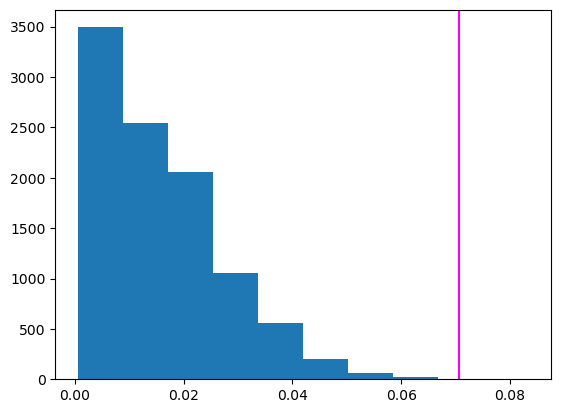

In [15]:
import matplotlib.pyplot as plt

plt.hist(distances, bins=10)
plt.axvline(x=observed, color='magenta', label='Observed difference')

empirical_p = np.count_nonzero(distances >= observed) / repetitions
empirical_p

The purple line that represents the actual observed difference in proportions of carcinogenic releases by top reporters in the TRI23CA dataset versus other reporters is very unlikely to appear if there were not a systemic difference between the groups. This is confirmed in our calculation of a very small empirical p-value. This means the null hypothesis - that there is not a difference between the proportion of carcinogenic chemical releases reported by top industries versus other industries - is very unlikely.

# About the Toxic Release Inventory 2023 - CA Dataset 

This dataset includes all toxic release inventory reports recorded by the U. S. Environmental Protection Agency for facilitites in the State of California for the year 2023.

### About the Attribute Groups
Each record includes information about the reporting Facility (by federal identifiers), the Location of the release event (address, city, county, etc.), the Company responsible for the event, the Facility Type (e.g. industry categories) and Filing details (e.g. document tracking number and form submitted). Each toxic release record also includes Basic Information about the released chemicals and their risk factors, as well as more detailed Chemical Information, and there are several attribute groups with detailed reporting information depending on the type of release (e.g. whether the toxin was released on site, transferred elsewhere, recycled, treated, etc.).

### About the Attributes
Information about all 122 attributes can be found in the EPA's [Guide to the TRI Basic Data Files](https://www.epa.gov/system/files/documents/2024-08/basic_data_files_documentation_august_2024.pdf). They can also be reviewed by revieweing the metainformation available in the CODAP document [here](https://codap.concord.org/app/static/dg/en/cert/index.html#shared=https%3A%2F%2Fcfm-shared.concord.org%2FPvQBqkl1RCqPETiMddga%2Ffile.json). The attributes that are most frequently referenced in the Choosy paper include:
- *Facility Name* of the reporter.
- *City* in which the reporting facility is located.
- *Industry Sector* is a categorization of primary industry or sector the reporting facility belongs to.
- *Clean Air Act Chemical* is a boolean flag indicating whether the released chemical is listed as a hazardous air pollutant under the Clean Air Act.
- *Carcinogen* indicates whether the released chemical is identified as a carcinogen by the Occupational Health and Safety Administration.
- *PBT* indicates whether a chemical is identified as a persistent, bioaccumulative,
toxic (PBT) chemical.
- *PFAS* indicates whether a chemical is identified as a per- and polyfluoroalkyl substance (PFAS).

### History and Purpose
An earlier version of this dataset was initially imported into CODAP in Summer 2024 for consideration as part of the curricular materials developed for the Writing Data Stories project (DGE-2430522). It was updated in March 2025, to accompany "How to be Choosy," a manuscript submission about wrangling educational datasets to make them more managable and meaningful for classroom use.

### Data Sources and Data Cleaning
This dataset was downloaded on March 5, 2025 from the U. S. Environmental Protection Agency's [Toxic Release Inventory Basic Data Tool](https://www.epa.gov/toxics-release-inventory-tri-program/tri-basic-data-files-calendar-years-1987-present), and filtered to only show data for the state of California. Attributes were renamed for usability using the EPA's [Guide to the TRI Basic Data Files](https://www.epa.gov/system/files/documents/2024-08/basic_data_files_documentation_august_2024.pdf).

In [ ]:
The development of these materials was supported by the National Science Foundation under Grant No. IIS-1900606.